In [101]:
import numpy as np
import webbrowser
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from ydata_profiling import ProfileReport 
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder ,FunctionTransformer , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
import pickle

In [2]:
#Dataset Dherai thulo raixa yetro thulo dataset ta chaenna yr hamro ml lai so 
#just maila 10000 ligye ahila ko lagi
df=pd.read_csv(r"C:\Users\anjil\Downloads\customer\customer_churn_dataset-training-master.csv")
df=df.sample(10000)

In [3]:

%matplotlib inline
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
339562,346677.0,43.0,Male,12.0,27.0,3.0,15.0,Premium,Annual,597.36,11.0,0.0
182687,187498.0,54.0,Male,46.0,21.0,10.0,16.0,Premium,Annual,661.00,9.0,1.0
34925,35063.0,31.0,Male,50.0,14.0,6.0,17.0,Standard,Annual,167.00,5.0,1.0
294683,301797.0,32.0,Female,12.0,25.0,1.0,17.0,Standard,Quarterly,777.70,15.0,0.0
301250,308364.0,49.0,Male,30.0,17.0,2.0,7.0,Standard,Quarterly,788.79,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
166092,170903.0,45.0,Male,41.0,14.0,4.0,20.0,Standard,Annual,822.00,30.0,0.0
384114,391229.0,26.0,Male,13.0,20.0,1.0,8.0,Premium,Quarterly,928.67,20.0,0.0
83967,86223.0,24.0,Male,43.0,21.0,3.0,17.0,Premium,Monthly,456.00,19.0,1.0
358911,366026.0,48.0,Male,39.0,15.0,1.0,15.0,Standard,Quarterly,531.04,2.0,0.0


In [4]:
df.drop(columns=["CustomerID"] , inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 339562 to 348933
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  float64
 1   Gender             10000 non-null  object 
 2   Tenure             10000 non-null  float64
 3   Usage Frequency    10000 non-null  float64
 4   Support Calls      10000 non-null  float64
 5   Payment Delay      10000 non-null  float64
 6   Subscription Type  10000 non-null  object 
 7   Contract Length    10000 non-null  object 
 8   Total Spend        10000 non-null  float64
 9   Last Interaction   10000 non-null  float64
 10  Churn              10000 non-null  float64
dtypes: float64(8), object(3)
memory usage: 937.5+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
#df.corr()
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
339562,43.0,Male,12.0,27.0,3.0,15.0,Premium,Annual,597.36,11.0,0.0
182687,54.0,Male,46.0,21.0,10.0,16.0,Premium,Annual,661.00,9.0,1.0
34925,31.0,Male,50.0,14.0,6.0,17.0,Standard,Annual,167.00,5.0,1.0
294683,32.0,Female,12.0,25.0,1.0,17.0,Standard,Quarterly,777.70,15.0,0.0
301250,49.0,Male,30.0,17.0,2.0,7.0,Standard,Quarterly,788.79,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
166092,45.0,Male,41.0,14.0,4.0,20.0,Standard,Annual,822.00,30.0,0.0
384114,26.0,Male,13.0,20.0,1.0,8.0,Premium,Quarterly,928.67,20.0,0.0
83967,24.0,Male,43.0,21.0,3.0,17.0,Premium,Monthly,456.00,19.0,1.0
358911,48.0,Male,39.0,15.0,1.0,15.0,Standard,Quarterly,531.04,2.0,0.0


In [8]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.32910,31.083200,15.835700,3.592600,12.928600,630.566733,14.337700,0.565000
std,12.49676,17.350809,8.548357,3.074926,8.275346,240.727179,8.522777,0.495782
min,18.00000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.00000,16.000000,9.000000,1.000000,6.000000,477.000000,7.000000,0.000000
50%,39.00000,31.000000,16.000000,3.000000,13.000000,659.255000,14.000000,1.000000
75%,48.00000,46.000000,23.000000,6.000000,19.000000,828.502500,22.000000,1.000000
max,65.00000,60.000000,30.000000,10.000000,30.000000,999.920000,30.000000,1.000000


In [9]:
#suru ma ta one hot encoding garnu xa 
#outlier handling ko kam pani xa
#yedi uniform distribution xaina bhane tyo pani milauna paryo
#Null data handling garne feature ni rakhnu paro


In [10]:
profile=ProfileReport(df , title="Simple Data Profiling" , explorative=True)
profile.to_file("simple_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
webbrowser.open("simple_report.html")

True

In [12]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [13]:
df.dropna(axis=0 , inplace=True)

In [14]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [15]:
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

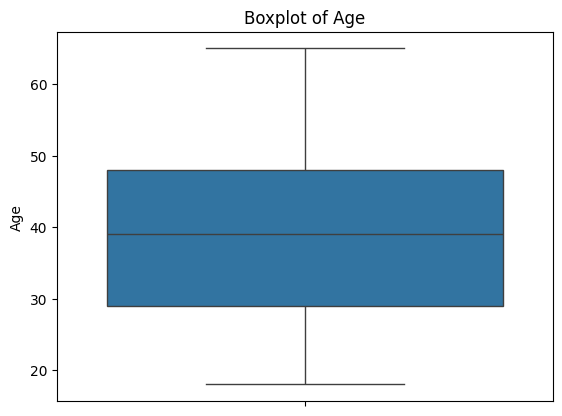

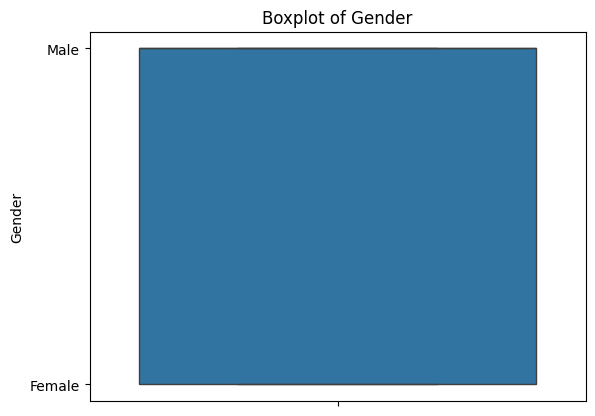

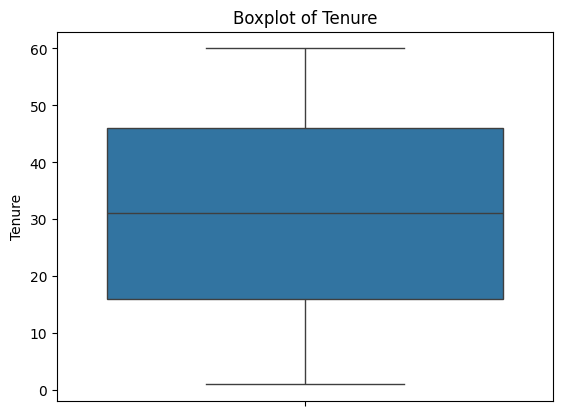

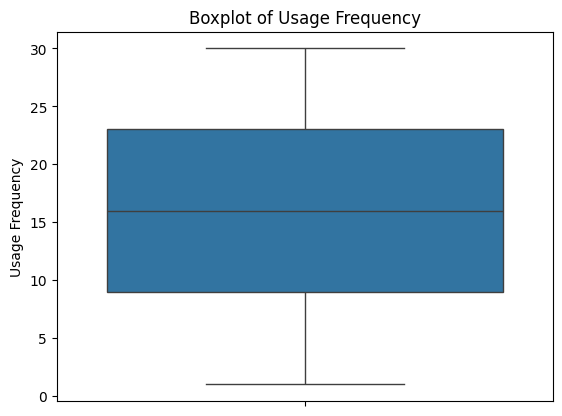

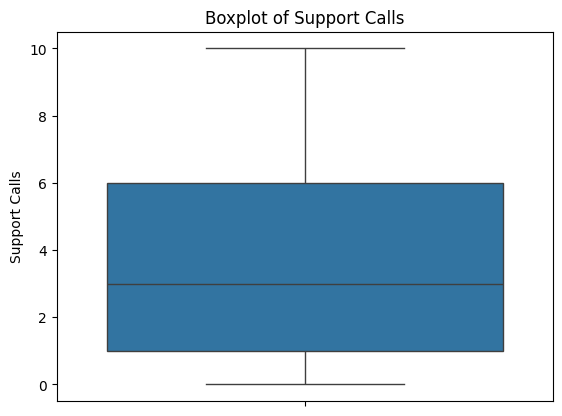

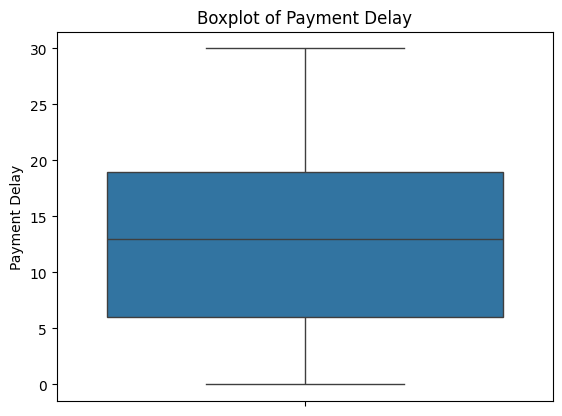

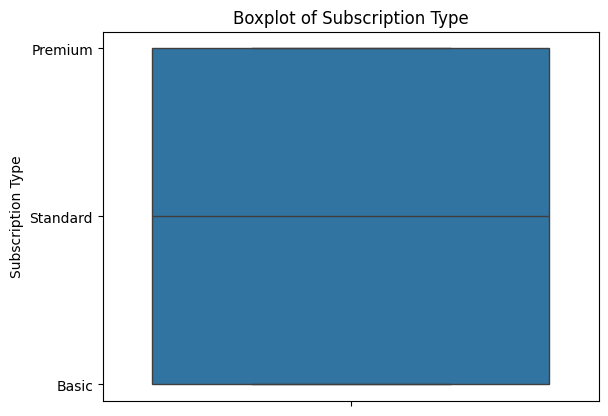

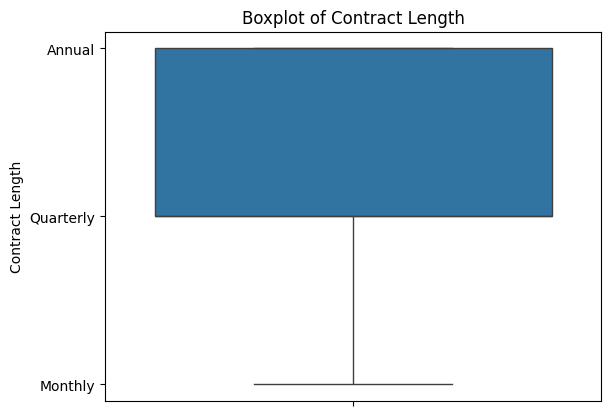

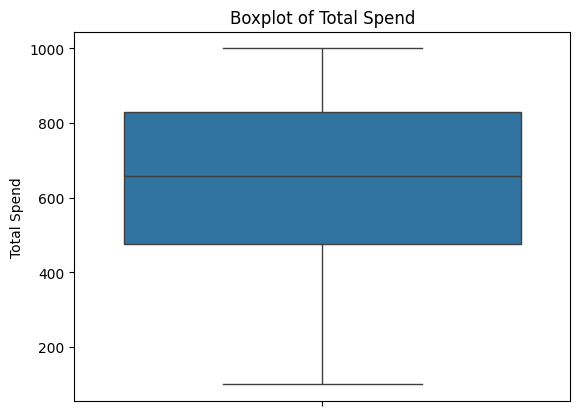

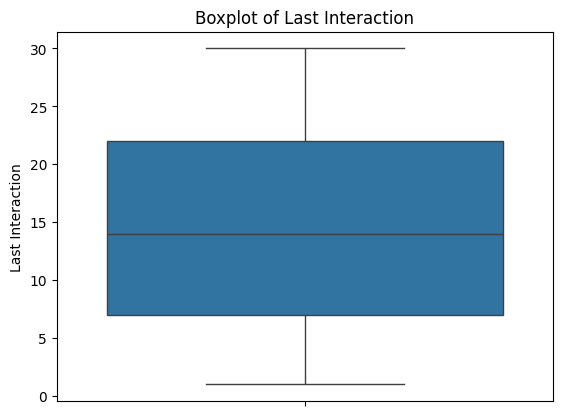

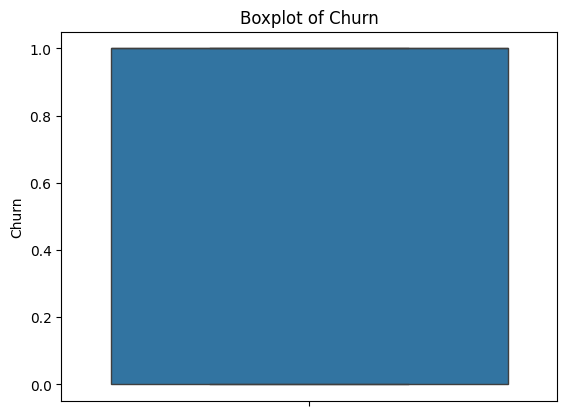

In [16]:
for i in df.columns.tolist():
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

In [17]:
#i guess there is no any outliers in the data

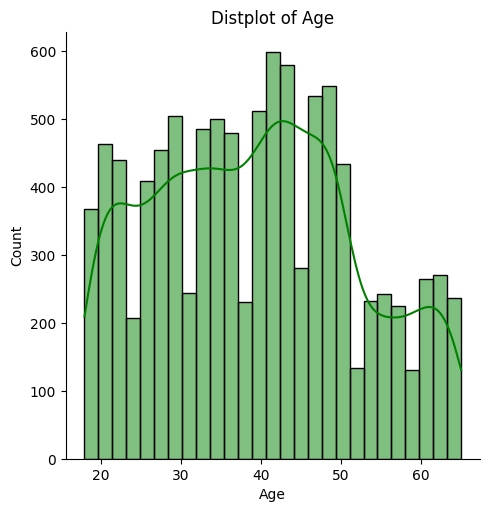

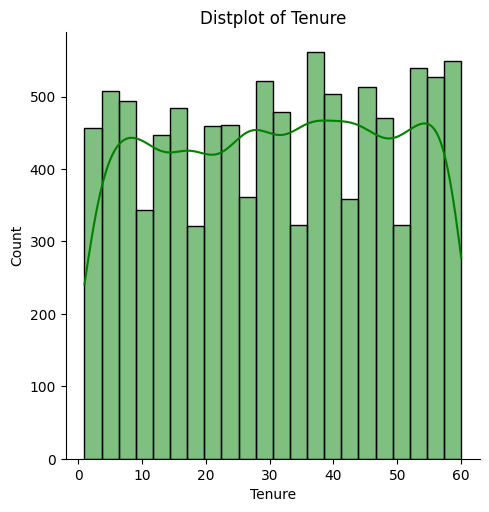

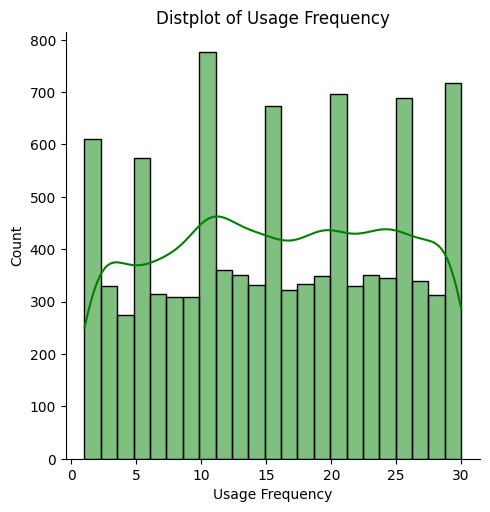

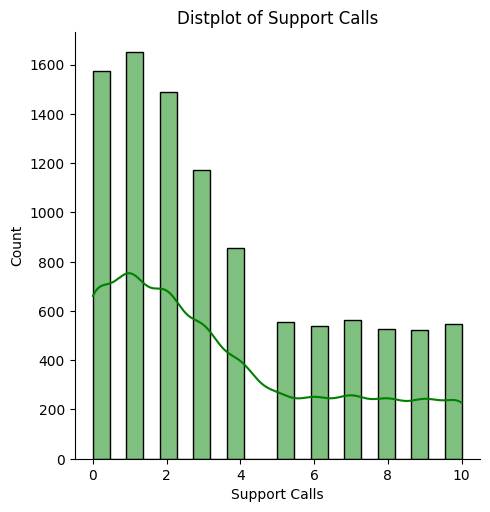

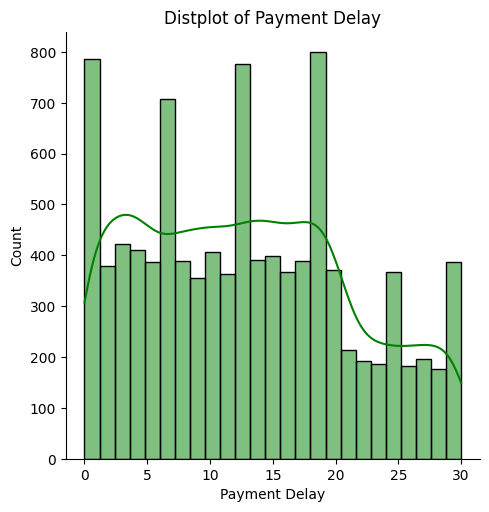

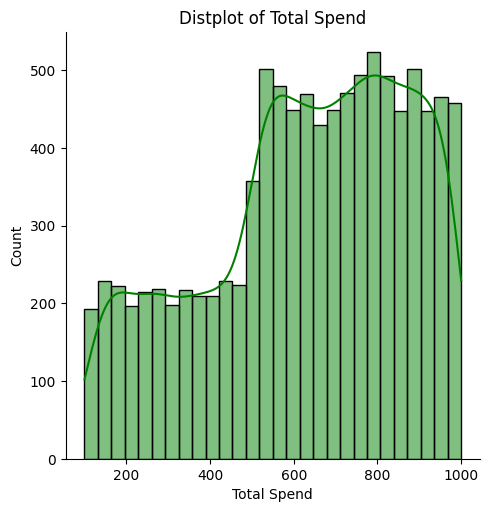

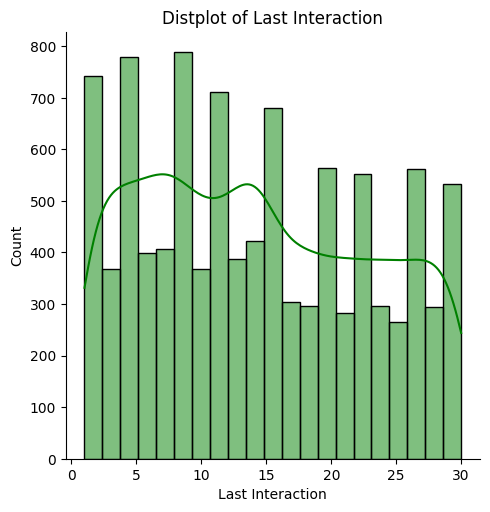

In [20]:
for i in numerical_columns:
    sns.displot(df[i] , kde=True , color="green" )
    plt.title(f"Distplot of {i}")
    plt.show()

In [19]:
numerical_columns=["Age",	"Tenure" , 	"Usage Frequency" ,	"Support Calls"	,"Payment Delay"	,"Total Spend",	"Last Interaction"]
categorical_columns=["Gender" , "Subscription Type" , "Contract Length"]
#all_columns_except_last=[]

In [21]:
df["Support Calls"].unique()

array([ 3., 10.,  6.,  1.,  2.,  4.,  0.,  8.,  9.,  7.,  5.])

In [ ]:
#for i in range(len( numerical_columns)) :
 #   sns.scatterplot(x=df[numerical_columns[i]] , y=df[i]  )

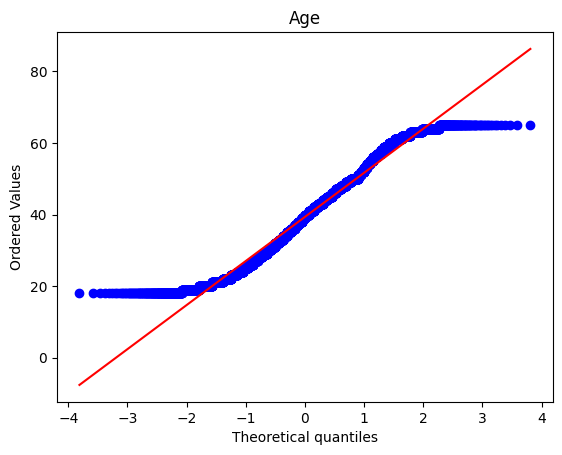

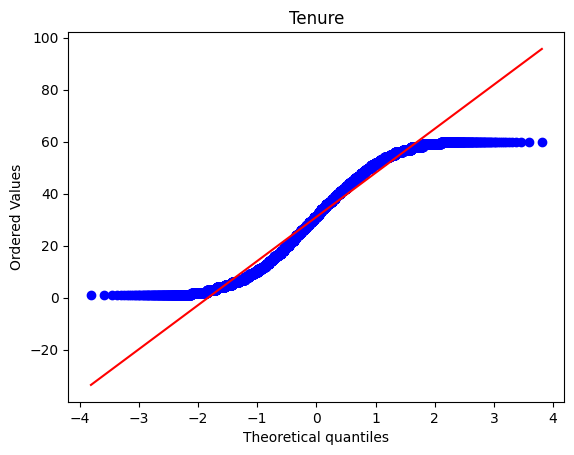

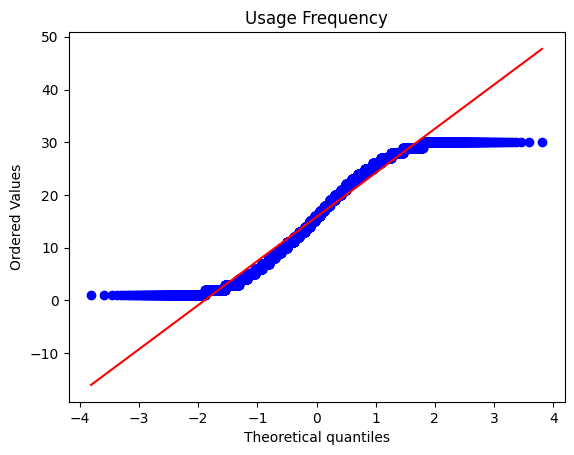

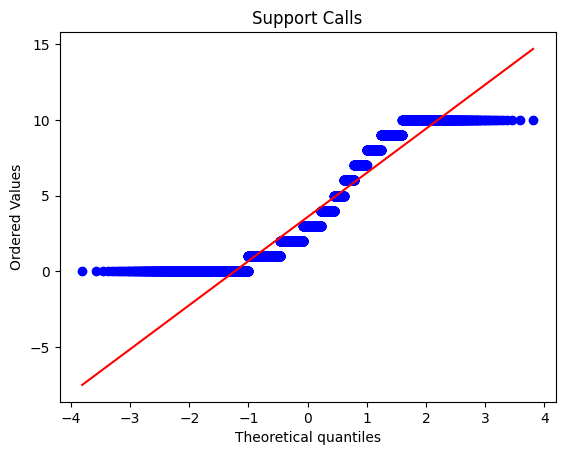

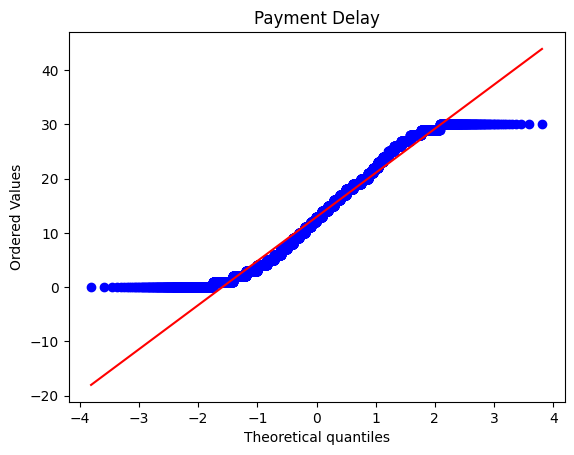

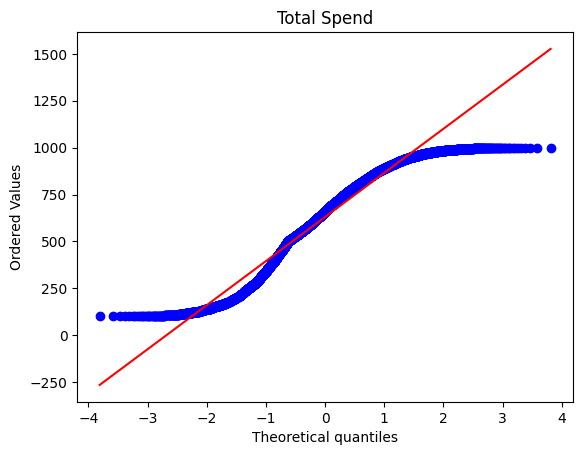

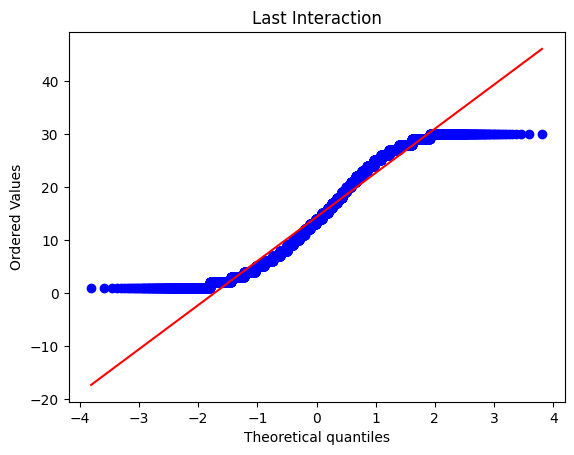

In [22]:
for i in numerical_columns:
    stats.probplot(df[i] , dist="norm" , plot=plt)
    plt.title(f"{i}")
    plt.show()

In [23]:
x=df.iloc[: , 0:10]
y=df.iloc[: , 10:]
x_train , x_test , y_train , y_test =train_test_split(x , y, test_size=0.2 , random_state=2)

In [76]:
tr1=ColumnTransformer(transformers=[
    ("ohe" , OneHotEncoder(sparse_output=False , handle_unknown="ignore" ,drop="first"), [1 , 6 , 7]),
], remainder="passthrough") 



In [77]:
tr2=ColumnTransformer(transformers=[ ("KNN" , KNNImputer(n_neighbors=5 , weights="uniform") ,[i for i in range(0 , 12)]),
                                    ("ss" ,StandardScaler() ,[i for i in range(0,12)])
                                   ] ,remainder="passthrough")

In [28]:
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [29]:
y_test.shape

(2000, 1)

In [30]:
x_test.shape

(2000, 10)

In [33]:
x_train.iloc[0:1 , :]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
63409,54.0,Female,33.0,9.0,2.0,8.0,Standard,Monthly,253.0,10.0


In [35]:
x_train_t.shape

(8000, 12)

In [34]:
print(f"Gender : {df['Gender'].unique()} \n"
      f"Subscription Type : {df['Subscription Type'].unique()} \n"
      f"Contract Length : {df['Contract Length'].unique()}")


Gender : ['Male' 'Female'] 
Subscription Type : ['Premium' 'Standard' 'Basic'] 
Contract Length : ['Annual' 'Quarterly' 'Monthly']


In [ ]:
#x_train_last.
x_test_last.shape
#x_train

In [ ]:
x_test_t.shape
x_test_t
x_train_t

In [26]:

list_of_data=['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']


In [ ]:
x_test_last

In [36]:
lr=LogisticRegression()
rf=RandomForestClassifier(n_estimators=150 , criterion="gini" ,max_depth=None , )
dt=DecisionTreeClassifier()
boost=XGBClassifier(learning_rate=0.1 , n_estimators=140 , max_depth=9)

In [37]:
lr.fit(x_train_last , y_train)
rf.fit(x_train_last , y_train)
dt.fit(x_train_last , y_train)
boost.fit(x_train_last , y_train)

c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
print(f"Logistic Regression :{accuracy_score(y_test , lr.predict(x_test_last ))} \n"
     f"Decision Tree :{accuracy_score(y_test , dt.predict(x_test_last )) } \n"
    f"Random Forest :{accuracy_score(y_test , rf.predict(x_test_last ))}\n"
    f"XG Boosting   :{accuracy_score(y_test , boost.predict(x_test_last ))} \n" )

Logistic Regression :0.893 
Decision Tree :0.997 
Random Forest :0.9915
XG Boosting   :0.997 



In [39]:
for i in [lr , rf , dt , boost]:
    print(f"{i}" ,np.mean(cross_val_score( i , x_test_last , y_test , scoring="accuracy" , cv=5)))

c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1339: DataConve

LogisticRegression() 0.8865000000000001


c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:1473: DataConversionW

RandomForestClassifier(n_estimators=150) 0.9855
DecisionTreeClassifier() 0.9865
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 0.994


In [ ]:
#here let us fine tune the xgboost which is giving the best result
param_grid={"n_estimators" :[100,120, 120 , 140 , 150 , 160] ,
            "max_depth" :[6, 7, 8 , 9, 10 , 11, 12 ,13, 14 ,15 , 16, 17],
            "learning_rate" :[0.1 ,0.15 , 0.2 ,0.25 , 0.3 ,0.35, 0.4]     }

In [ ]:
grid_search=GridSearchCV(estimator=boost , param_grid=param_grid , cv=5 , verbose=2)

In [ ]:
grid_search.fit(x_train_last , y_train)

In [ ]:
print(grid_search.best_estimator_)
grid_search.best_params_

In [79]:
#so just got 99 accuracy on my dataset  using the xgboost
pipe=Pipeline(steps=[
    ("tr1" , tr1),
    ("tr2" , tr2),
    ("boost" , boost)
    
])

In [80]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6, 7])])),
                ('tr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('KNN', KNNImputer(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]),
                                                 ('ss', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11])])),
                ('boost',
                 XGBC...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=140, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [92]:
pipe.fit(x_train , y_train)
accuracy=pipe.score(x_test , y_test)

In [99]:
#yo thau ma chai 2d array expect gari raxa hai data le
predicted=pipe.predict(np.array([[40.0, 'Male', 36.0, 7.0, 2.0, 18.0, 'Premium', 'Annual', 722.55,
       9.0]]))
predicted

c:\users\anjil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0])

In [83]:
pipe

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
368519,40.0,Male,36.0,7.0,2.0,18.0,Premium,Annual,722.55,9.0
206102,25.0,Male,14.0,3.0,3.0,15.0,Premium,Monthly,364.21,7.0
383910,43.0,Male,38.0,25.0,2.0,2.0,Basic,Quarterly,967.00,5.0
137687,38.0,Female,26.0,12.0,8.0,16.0,Standard,Monthly,457.00,6.0
27450,64.0,Male,4.0,2.0,9.0,14.0,Standard,Quarterly,721.00,6.0
...,...,...,...,...,...,...,...,...,...,...
128478,62.0,Male,19.0,7.0,0.0,22.0,Premium,Quarterly,851.00,8.0
264565,40.0,Female,51.0,11.0,3.0,16.0,Premium,Quarterly,889.68,2.0
243658,35.0,Male,49.0,6.0,8.0,5.0,Standard,Annual,567.88,17.0
255475,43.0,Male,46.0,5.0,4.0,19.0,Premium,Quarterly,809.93,25.0


In [98]:
x_test.iloc[[0]]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
368519,40.0,Male,36.0,7.0,2.0,18.0,Premium,Annual,722.55,9.0


In [102]:
pickle.dump(pipe , open("churn_data.pkl", "wb"))